In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
PATH_TO_DATA = '../data/train-balanced-sarcasm.csv'
train_df = pd.read_csv(PATH_TO_DATA)
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train_df.dropna(subset=['comment'], inplace=True)
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [6]:
train, val, y_train, y_val = train_test_split(train_df['comment'], train_df['label'], random_state=17)

In [8]:
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)
svm_model = SVC(kernel='linear', random_state=17, verbose=True)
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
# sklearn's pipeline
tfidf_pipeline = Pipeline([('tf_idf', tf_idf), 
                           ('model', logit)])

In [9]:
tfidf_pipeline.fit(train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        50001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25460D+05    |proj g|=  1.32078D+03


 This problem is unconstrained.



At iterate   50    f=  4.09699D+05    |proj g|=  1.82953D+03

At iterate  100    f=  4.05975D+05    |proj g|=  5.46521D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
50001    100    115      1     0     0   5.465D+02   4.060D+05
  F =   405974.99656022614     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/victor/Projects/sarcasm_detector/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    7.3s finished


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('model',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [10]:
valid_pred = tfidf_pipeline.predict(val)

In [11]:
accuracy_score(y_val, valid_pred)

0.7208362683720231

In [14]:
from utils import plot_confusion_matrix

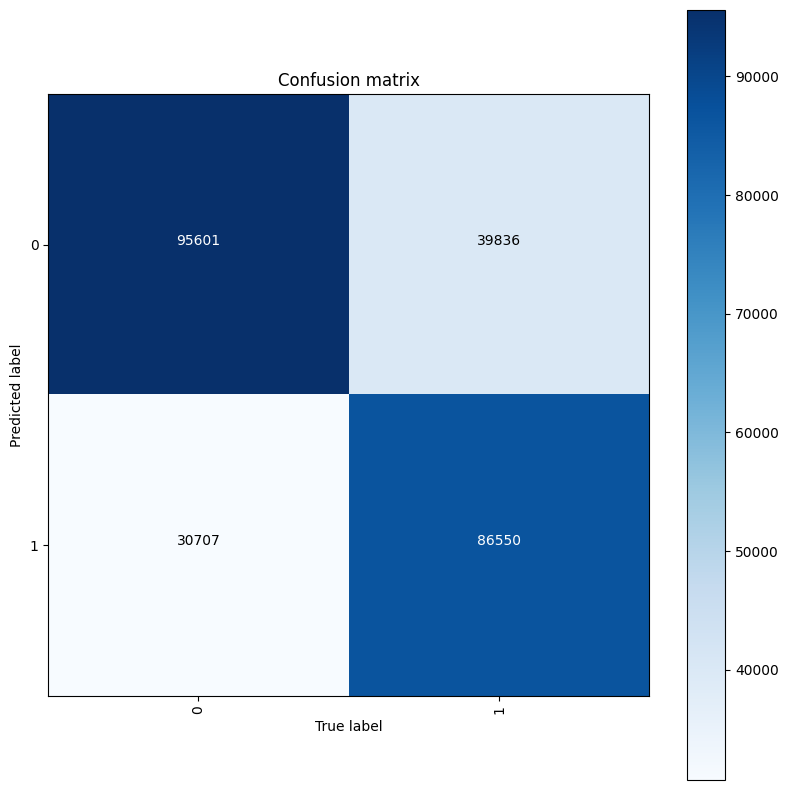

In [17]:
plot_confusion_matrix(y_val, valid_pred, tfidf_pipeline.named_steps['model'].classes_, figsize=(8, 8))

In [7]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])

array([1])